<a href="https://colab.research.google.com/github/sinapordanesh/PyTorch_Lab/blob/main/islp/Chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 1.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=0733f49126c368088d99308971dcd3b243e787922410cedc401fc4be4707b91a
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [2]:
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
from sklearn.linear_model import \
(LinearRegression ,
LogisticRegression ,
Lasso)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from sklearn.model_selection import \
(train_test_split ,
GridSearchCV)

In [3]:
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset

In [4]:
! pip install torchmetrics torchinfo torchvision

In [5]:
from torchmetrics import (MeanAbsoluteError ,
R2Score)
from torchinfo import summary
from torchvision.io import read_image

In [6]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger

In [7]:
!pip install pytorch_lightning --upgrade


In [8]:
from pytorch_lightning import seed_everything
seed_everything(0, workers=True)
torch.use_deterministic_algorithms(True , warn_only=True)

INFO:lightning_fabric.utilities.seed:Seed set to 0


In [9]:
from torchvision.datasets import MNIST, CIFAR100
from torchvision.models import (resnet50, ResNet50_Weights)
from torchvision.transforms import (Resize ,
Normalize ,
CenterCrop ,
ToTensor)

In [10]:
from ISLP.torch import (SimpleDataModule ,
SimpleModule ,
ErrorTracker ,
rec_num_workers)

In [11]:
from ISLP.torch.imdb import (load_lookup ,
load_tensor ,
load_sparse ,
load_sequential)

In [12]:
from glob import glob
import json

## 10.9.1 Single Layer Network on Hitters Data

In [21]:
Hitters = load_data('Hitters').dropna()
n = Hitters.shape[0]

In [22]:
n

263

In [23]:
MS

ISLP.models.model_spec.ModelSpec

In [25]:
model = MS(Hitters.columns.drop('Salary'), intercept=False)
X = model.fit_transform(Hitters).to_numpy()
Y = Hitters['Salary'].to_numpy()

In [26]:
(X_train ,
X_test ,
Y_train ,
Y_test) = train_test_split(X,
Y,
test_size=1/3,
random_state=1)

In [30]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((175, 19), (175,), (88, 19), (88,))

## Linear Models

In [31]:
hit_lm = LinearRegression().fit(X_train , Y_train)
Yhat_test = hit_lm.predict(X_test)
np.abs(Yhat_test - Y_test).mean()

259.7152883314631

In [32]:
StandardScaler

sklearn.preprocessing._data.StandardScaler

In [33]:
Lasso

sklearn.linear_model._coordinate_descent.Lasso

In [36]:
Pipeline


sklearn.pipeline.Pipeline

In [35]:
scaler = StandardScaler(with_mean=True , with_std=True)
lasso = Lasso(warm_start=True , max_iter =30000)
standard_lasso = Pipeline(steps=[('scaler', scaler),('lasso', lasso)])

In [47]:
np.fabs(-1.453)

1.453

In [38]:
X_s = scaler.fit_transform(X_train)
n = X_s.shape[0]
# lam_max is the smallest value of lambda
lam_max = np.fabs(X_s.T.dot(Y_train - Y_train.mean())).max() / n
param_grid = {'alpha': np.exp(np.linspace(0, np.log(0.01), 100))* lam_max}

In [57]:
X_s.shape, n, (Y_train - Y_train.mean())[:, None].shape

((175, 19), 175, (175, 1))

In [58]:
np.linspace?

In [53]:
# X_s.T -> Transpose

In [67]:
param_grid, param_grid['alpha'].shape

({'alpha': array([255.65755026, 244.03752004, 232.94563812, 222.35789935,
         212.25138966, 202.60423642, 193.39556119, 184.60543446,
         176.21483255, 168.20559645, 160.5603925 , 153.26267486,
         146.29664975, 139.64724123, 133.3000586 , 127.24136521,
         121.45804878, 115.93759301, 110.66805048, 105.63801679,
         100.83660589,  96.25342653,  91.87855974,  87.7025374 ,
          83.71632172,  79.9112857 ,  76.27919443,  72.81218732,
          69.50276103,  66.34375328,  63.3283273 ,  60.44995709,
          57.70241324,  55.07974951,  52.57628988,  50.18661637,
          47.9055572 ,  45.72817569,  43.64975953,  41.66581059,
          39.7720352 ,  37.96433481,  36.23879721,  34.59168794,
          33.01944234,  31.51865773,  30.08608609,  28.71862704,
          27.41332112,  26.16734337,  24.97799723,  23.8427087 ,
          22.7590208 ,  21.72458818,  20.73717211,  19.79463564,
          18.8949389 ,  18.03613476,  17.2163646 ,  16.43385426,
          15.686

In [60]:
KFold

sklearn.model_selection._split.KFold

In [61]:
GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [71]:
Lasso

sklearn.linear_model._coordinate_descent.Lasso

In [59]:
cv = KFold(10,shuffle=True ,random_state=1)
grid = GridSearchCV(lasso ,param_grid ,cv=cv,scoring='neg_mean_absolute_error')
grid.fit(X_train , Y_train);

In [70]:
grid.best_estimator_

Lasso(alpha=176.2148325524328, max_iter=30000, warm_start=True)

In [ ]:
trained_lasso = grid.best_estimator_
Yhat_test = trained_lasso.predict(X_test)
np.fabs(Yhat_test - Y_test).mean()

## Specifying a Network: Classes and Inheritance

In [76]:
nn.Flatten

torch.nn.modules.flatten.Flatten

In [72]:
class HittersModel(nn.Module):
  def __init__(self , input_size):
    super(HittersModel , self).__init__()
    self.flatten = nn.Flatten()
    self.sequential = nn.Sequential(
      nn.Linear(input_size , 50),
      nn.ReLU(),
      nn.Dropout (0.4),
      nn.Linear(50, 1)
      )
  def forward(self , x):
    x = self.flatten(x)
    return torch.flatten(self.sequential(x))

In [84]:
X.shape,

((263, 19),)

In [77]:
hit_model = HittersModel(X.shape[1])

In [80]:
summary(hit_model ,
input_size=X_train.shape ,
col_names=['input_size',
'output_size',
'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
HittersModel                             [175, 19]                 [175]                     --
├─Flatten: 1-1                           [175, 19]                 [175, 19]                 --
├─Sequential: 1-2                        [175, 19]                 [175, 1]                  --
│    └─Linear: 2-1                       [175, 19]                 [175, 50]                 1,000
│    └─ReLU: 2-2                         [175, 50]                 [175, 50]                 --
│    └─Dropout: 2-3                      [175, 50]                 [175, 50]                 --
│    └─Linear: 2-4                       [175, 50]                 [175, 1]                  51
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
Total mult-adds (M): 0.18
Input size (MB): 0.01
Forward/backward pass size (MB): 0.07
Params size (MB): 0.00
Estimated Total Size (MB): 0.09

In [85]:
type(X[0][0])

numpy.float64

In [98]:
X_train_t = torch.tensor(X_train.astype(np.float32))
Y_train_t = torch.tensor(Y_train.astype(np.float32))
hit_train = TensorDataset(X_train_t , Y_train_t)

In [100]:
X_test_t = torch.tensor(X_test.astype(np.float32))
Y_test_t = torch.tensor(Y_test.astype(np.float32))
hit_test = TensorDataset(X_test_t , Y_test_t)

In [91]:
TensorDataset


torch.utils.data.dataset.TensorDataset

In [95]:
rec_num_workers

<function ISLP.torch.rec_num_workers()>

In [18]:
max_num_workers = rec_num_workers(); max_num_workers


2

In [102]:
SimpleDataModule

ISLP.torch.lightning.SimpleDataModule

In [101]:
hit_dm = SimpleDataModule(hit_train , hit_test , batch_size=32, num_workers=min(4, max_num_workers),
validation=hit_test)

In [104]:
SimpleModule

ISLP.torch.lightning.SimpleModule

In [103]:
hit_module = SimpleModule.regression(hit_model ,
metrics={'mae':MeanAbsoluteError()})

In [106]:
hit_logger = CSVLogger('logs', name='hitters')

In [110]:
Trainer?

In [108]:
hit_trainer = Trainer(deterministic=True ,
max_epochs=50,
log_every_n_steps=5,
logger=hit_logger ,
callbacks=[ErrorTracker()])
hit_trainer.fit(hit_module , datamodule=hit_dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory logs/hitters/version_0/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type         | Params | Mode 
-----------------------------------------------
0 | model | HittersModel | 1.1 K  | train
1 | loss  | MSELoss      | 0      | train
-----------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


In [111]:
In [28]: hit_trainer.test(hit_module , datamodule=hit_dm)

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       102527.21875        │
│         test_mae          │     210.1840362548828     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 102527.21875, 'test_mae': 210.1840362548828}]

In [112]:
hit_results = pd.read_csv(hit_logger.experiment.metrics_file_path)

In [113]:
hit_results


epoch  step     test_loss    test_mae     train_loss  train_mae_epoch  \
0        0     4           NaN         NaN            NaN              NaN   
1        0     5           NaN         NaN            NaN              NaN   
2        0     5           NaN         NaN  715415.250000       561.457336   
3        1     9           NaN         NaN            NaN              NaN   
4        1    11           NaN         NaN            NaN              NaN   
..     ...   ...           ...         ...            ...              ...   
316     49   294           NaN         NaN            NaN              NaN   
317     49   299           NaN         NaN            NaN              NaN   
318     49   299           NaN         NaN            NaN              NaN   
319     49   299           NaN         NaN  111995.039062       234.656387   
320     50   300  102527.21875  210.184036            NaN              NaN   

     train_mae_step    valid_loss   valid_mae  
0        386.986084           NaN         NaN  
1               NaN  145063.59375  237.685242  
2               NaN           NaN         NaN  
3        273.843872           NaN         NaN  
4               NaN  131679.78125  236.432709  
..              ...           ...         ...  
316      227.067123           NaN         NaN  
317      258.721741           NaN         NaN  
318             NaN  102527.21875  210.184036  
319             NaN           NaN         NaN  
320             NaN           NaN         NaN  

[321 rows x 9 columns]

In [42]:
def summary_plot(results ,
ax,
col='loss',
valid_legend='Validation',
training_legend='Training',
ylabel='Loss',
fontsize=20):
  for (column ,
  color ,
  label) in zip([f'train_{col}_epoch',
  f'valid_{col}'],
  ['black',
  'red'],
  [training_legend ,
  valid_legend]):
    results.plot(x='epoch',
    y=column ,
    label=label ,
    marker='o',
    color=color ,
    ax=ax)
  ax.set_xlabel('Epoch')
  ax.set_ylabel(ylabel)
  return ax

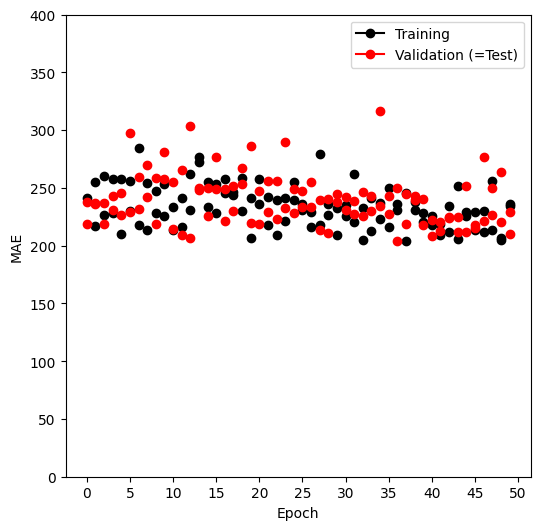

In [115]:
fig , ax = subplots(1, 1, figsize=(6, 6))
ax = summary_plot(hit_results ,
ax,
col='mae',
ylabel='MAE',
valid_legend='Validation (=Test)')
ax.set_ylim([0, 400])
ax.set_xticks(np.linspace(0, 50, 11).astype(int));

In [116]:
hit_model.eval()
preds = hit_module(X_test_t)
torch.abs(Y_test_t - preds).mean()

tensor(210.1840, grad_fn=<MeanBackward0>)

## Cleanup

In [117]:
del(Hitters ,
hit_model , hit_dm ,
hit_logger ,
hit_test , hit_train ,
X, Y,
X_test , X_train ,
Y_test , Y_train ,
X_test_t , Y_test_t ,
hit_trainer , hit_module)

# 10.9.2 Multilayer Network on the MNIST Digit Data


### MNIST Digit Dataset Schema:

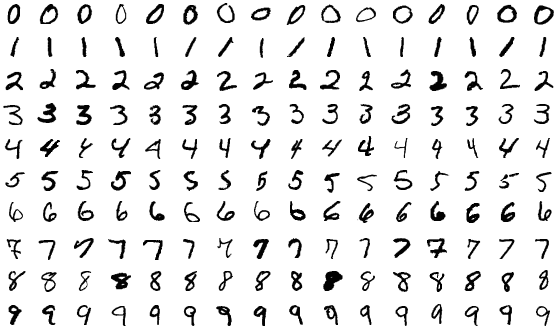

In [13]:
(mnist_train , mnist_test) = [MNIST(root='data',
train=train ,
download=True ,
transform=ToTensor())
for train in [True , False]]
mnist_train

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.6MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 425kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.85MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.54MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
MNIST?

In [15]:
SimpleDataModule

ISLP.torch.lightning.SimpleDataModule

In [19]:
mnist_dm = SimpleDataModule(mnist_train ,
mnist_test ,
validation=0.2,
num_workers=max_num_workers ,
batch_size =256)

In [20]:
for batch in mnist_dm.train_dataloader():
    features, labels = batch
    print("Feature Shape:", features.shape)
    print("Label Shape:", labels.shape)
    break

Feature Shape: torch.Size([256, 1, 28, 28])
Label Shape: torch.Size([256])


In [21]:
for idx , (X_ ,Y_) in enumerate(mnist_dm.train_dataloader()):
  print('X: ', X_.shape)
  print('Y: ', Y_.shape)
  if idx >= 1:
    break

X:  torch.Size([256, 1, 28, 28])
Y:  torch.Size([256])
X:  torch.Size([256, 1, 28, 28])
Y:  torch.Size([256])


In [22]:
class MNISTModel(nn.Module):
  def __init__(self):
    super(MNISTModel , self).__init__()
    self.layer1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 256),
    nn.ReLU(),
    nn.Dropout (0.4))
    self.layer2 = nn.Sequential(
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout (0.3))
    self._forward = nn.Sequential(
    self.layer1 ,
    self.layer2 ,
    nn.Linear(128, 10))
  def forward(self , x):
    return self._forward(x)

In [23]:
In [37]: mnist_model = MNISTModel()

In [24]:
In [38]: mnist_model(X_).size()

torch.Size([256, 10])

In [25]:
summary(mnist_model ,
input_data=X_,
col_names=['input_size',
'output_size',
'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
MNISTModel                               [256, 1, 28, 28]          [256, 10]                 --
├─Sequential: 1-1                        [256, 1, 28, 28]          [256, 10]                 --
│    └─Sequential: 2-1                   [256, 1, 28, 28]          [256, 256]                --
│    │    └─Flatten: 3-1                 [256, 1, 28, 28]          [256, 784]                --
│    │    └─Linear: 3-2                  [256, 784]                [256, 256]                200,960
│    │    └─ReLU: 3-3                    [256, 256]                [256, 256]                --
│    │    └─Dropout: 3-4                 [256, 256]                [256, 256]                --
│    └─Sequential: 2-2                   [256, 256]                [256, 128]                --
│    │    └─Linear: 3-5                  [256, 256]                [256, 128]                32,896
│    │    └─ReLU: 3-6     

In [26]:
mnist_module = SimpleModule.classification(mnist_model, num_classes=10)
mnist_logger = CSVLogger('logs', name='MNIST')

In [27]:
mnist_trainer = Trainer(deterministic=True ,
max_epochs=30,
logger=mnist_logger ,
callbacks=[ErrorTracker()])
mnist_trainer.fit(mnist_module ,
datamodule=mnist_dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | MNISTModel       | 235 K  | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
235 K     Trainable params
0         Non-trainable params
235 K     Total params
0.941     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:
Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

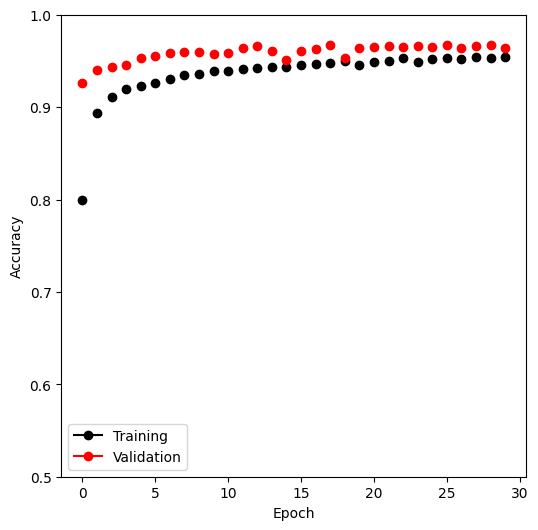

In [144]:
mnist_results = pd.read_csv(mnist_logger.experiment.
metrics_file_path)
fig , ax = subplots(1, 1, figsize=(6, 6))
summary_plot(mnist_results ,
ax,
col='accuracy',
ylabel='Accuracy')
ax.set_ylim([0.5, 1])
ax.set_ylabel('Accuracy')
ax.set_xticks(np.linspace(0, 30, 7).astype(int));

In [145]:
mnist_trainer.test(mnist_module ,
datamodule=mnist_dm)

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9639999866485596     │
│         test_loss         │    0.14719873666763306    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.14719873666763306, 'test_accuracy': 0.9639999866485596}]

In [148]:
class MNIST_MLR(nn.Module):
  def __init__(self):
    super(MNIST_MLR , self).__init__()
    self.linear = nn.Sequential(nn.Flatten(),
    nn.Linear(784, 10))
  def forward(self , x):
    return self.linear(x)

In [152]:
mlr_model = MNIST_MLR()
mlr_module = SimpleModule.classification(mlr_model, num_classes=10)
mlr_logger = CSVLogger('logs', name='MNIST_MLR')

In [ ]:
mlr_trainer = Trainer(deterministic=True ,
max_epochs=30,
callbacks=[ErrorTracker()])
mlr_trainer.fit(mlr_module , datamodule=mnist_dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | MNIST_MLR        | 7.9 K  | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
7.9 K     Trainable params
0         Non-trainable params
7.9 K     Total params
0.031     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [28]:
mlr_trainer.test(mlr_module ,
datamodule=mnist_dm)

NameError: name 'mlr_trainer' is not defined

In [29]:
del(mnist_test ,
mnist_train ,mnist_model ,
mnist_dm ,
mnist_trainer ,
mnist_module ,
mnist_results ,
mlr_model ,
mlr_module ,
mlr_trainer)

NameError: name 'mnist_results' is not defined

# 10.9.3 Convolutional Neural Networks

In [30]:
(cifar_train ,
cifar_test) = [CIFAR100(root="data",
train=train ,
download=True)
for train in [True , False]]


  0%|          | 0.00/169M [00:00<?, ?B/s]
  0%|          | 65.5k/169M [00:00<04:30, 624kB/s]
  0%|          | 229k/169M [00:00<02:25, 1.16MB/s]
  1%|          | 918k/169M [00:00<00:47, 3.56MB/s]
  2%|▏         | 3.70M/169M [00:00<00:13, 12.3MB/s]
  6%|▋         | 10.7M/169M [00:00<00:04, 32.2MB/s]
  9%|▉         | 15.7M/169M [00:00<00:04, 37.9MB/s]
 12%|█▏        | 20.6M/169M [00:00<00:03, 41.5MB/s]
 16%|█▌        | 27.4M/169M [00:00<00:03, 46.4MB/s]
 20%|██        | 34.1M/169M [00:00<00:02, 49.4MB/s]
 24%|██▍       | 41.0M/169M [00:01<00:02, 51.5MB/s]
 29%|██▊       | 48.2M/169M [00:01<00:02, 52.9MB/s]
 32%|███▏      | 54.7M/169M [00:01<00:02, 53.4MB/s]
 36%|███▋      | 61.5M/169M [00:01<00:01, 54.0MB/s]
 40%|████      | 68.1M/169M [00:01<00:01, 54.4MB/s]
 44%|████▍     | 74.9M/169M [00:01<00:01, 54.7MB/s]
 48%|████▊     | 81.6M/169M [00:01<00:01, 54.8MB/s]
 52%|█████▏    | 88.2M/169M [00:01<00:01, 54.9MB/s]
 56%|█████▌    | 94.9M/169M [00:02<00:01, 55.0MB/s]
 60%|██████    | 102M/1

Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [31]:
transform = ToTensor()
cifar_train_X = torch.stack([transform(x) for x in
cifar_train.data])
cifar_test_X = torch.stack([transform(x) for x in
cifar_test.data])
cifar_train = TensorDataset(cifar_train_X ,
torch.tensor(cifar_train.targets))
cifar_test = TensorDataset(cifar_test_X ,
torch.tensor(cifar_test.targets))

In [32]:
cifar_dm = SimpleDataModule(cifar_train ,
cifar_test ,
validation=0.2,
num_workers=max_num_workers ,
batch_size =128)

In [33]:
for idx , (X_ ,Y_) in enumerate(cifar_dm.train_dataloader()):
  print('X: ', X_.shape)
  print('Y: ', Y_.shape)
  if idx >= 1:
    break

X:  torch.Size([128, 3, 32, 32])
Y:  torch.Size([128])
X:  torch.Size([128, 3, 32, 32])
Y:  torch.Size([128])


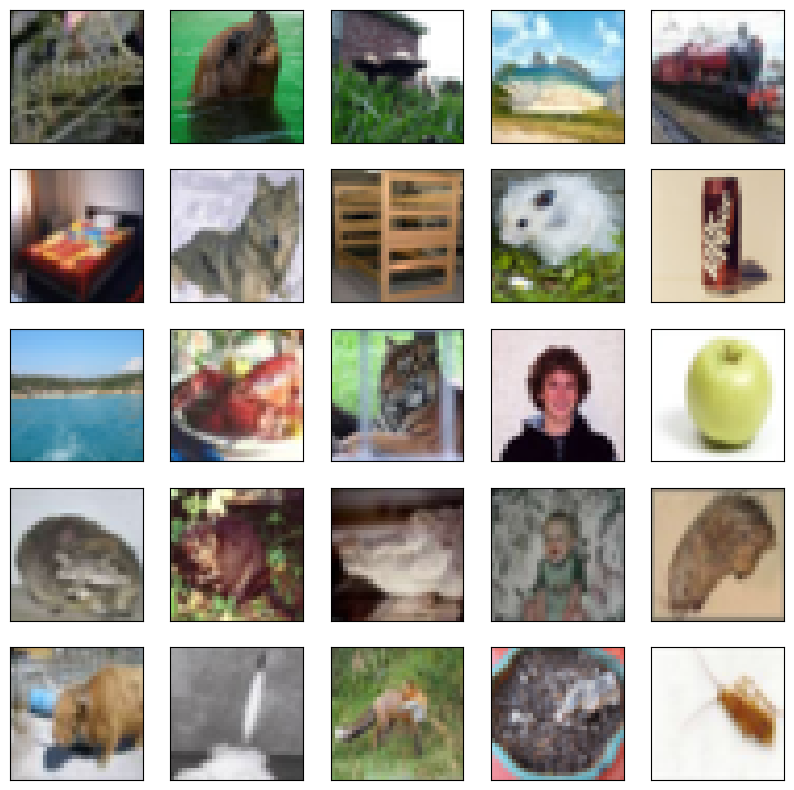

In [34]:
fig , axes = subplots(5, 5, figsize=(10,10))
rng = np.random.default_rng(4)
indices = rng.choice(np.arange(len(cifar_train)), 25,
replace=False).reshape((5,5))
for i in range(5):
  for j in range(5):
    idx = indices[i,j]
    axes[i,j].imshow(np.transpose(cifar_train[idx][0],
    [1,2,0]),
    interpolation=None)
    axes[i,j].set_xticks ([])
    axes[i,j].set_yticks ([])

In [35]:
class BuildingBlock(nn.Module):
  def __init__(self ,
    in_channels ,
    out_channels):
    super(BuildingBlock , self).__init__()
    self.conv = nn.Conv2d(in_channels=in_channels ,
    out_channels=out_channels ,
    kernel_size=(3,3),
    padding='same')
    self.activation = nn.ReLU()
    self.pool = nn.MaxPool2d(kernel_size=(2,2))
  def forward(self , x):
    return self.pool(self.activation(self.conv(x)))

In [36]:
class CIFARModel(nn.Module):
  def __init__(self):
    super(CIFARModel , self).__init__()
    sizes = [(3,32),
    (32,64),
    (64,128),
    (128,256)]
    self.conv = nn.Sequential(*[BuildingBlock(in_ , out_)
    for in_ , out_ in sizes])
    self.output = nn.Sequential(nn.Dropout (0.5),
    nn.Linear(2*2*256, 512),
    nn.ReLU(),
    nn.Linear(512, 100))
  def forward(self , x):
    val = self.conv(x)
    val = torch.flatten(val , start_dim=1)
    return self.output(val)

In [37]:
cifar_model = CIFARModel()
summary(cifar_model ,
input_data=X_,
col_names=['input_size',
'output_size',
'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
CIFARModel                               [128, 3, 32, 32]          [128, 100]                --
├─Sequential: 1-1                        [128, 3, 32, 32]          [128, 256, 2, 2]          --
│    └─BuildingBlock: 2-1                [128, 3, 32, 32]          [128, 32, 16, 16]         --
│    │    └─Conv2d: 3-1                  [128, 3, 32, 32]          [128, 32, 32, 32]         896
│    │    └─ReLU: 3-2                    [128, 32, 32, 32]         [128, 32, 32, 32]         --
│    │    └─MaxPool2d: 3-3               [128, 32, 32, 32]         [128, 32, 16, 16]         --
│    └─BuildingBlock: 2-2                [128, 32, 16, 16]         [128, 64, 8, 8]           --
│    │    └─Conv2d: 3-4                  [128, 32, 16, 16]         [128, 64, 16, 16]         18,496
│    │    └─ReLU: 3-5                    [128, 64, 16, 16]         [128, 64, 16, 16]         --
│    │    └─MaxPool2d: 3-6    

In [39]:
cifar_optimizer = RMSprop(cifar_model.parameters(), lr=0.001)
cifar_module = SimpleModule.classification(cifar_model ,optimizer=cifar_optimizer, num_classes=100)
cifar_logger = CSVLogger('logs', name='CIFAR100')

In [40]:
cifar_trainer = Trainer(deterministic=True ,
max_epochs=30,
logger=cifar_logger ,
callbacks=[ErrorTracker()])
cifar_trainer.fit(cifar_module ,
datamodule=cifar_dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | CIFARModel       | 964 K  | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
964 K     Trainable params
0         Non-trainable params
964 K     Total params
3.858     Total estimated model params size (MB)
24        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


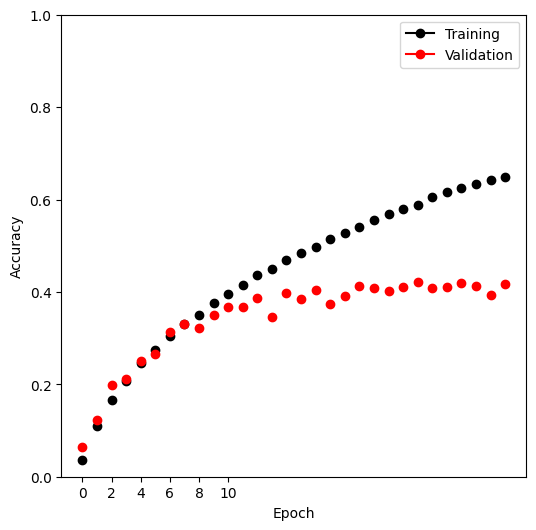

In [43]:
log_path = cifar_logger.experiment.metrics_file_path
cifar_results = pd.read_csv(log_path)
fig , ax = subplots(1, 1, figsize=(6, 6))
summary_plot(cifar_results ,
ax,
col='accuracy',
ylabel='Accuracy')
ax.set_xticks(np.linspace(0, 10, 6).astype(int))
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1]);

In [ ]:
cifar_trainer.test(cifar_module , datamodule=cifar_dm)

### Hardware Acceleration

In [44]:
try:
  for name , metric in cifar_module.metrics.items():
    cifar_module.metrics[name] = metric.to('mps')
  cifar_trainer_mps = Trainer(accelerator='mps',
  deterministic=True ,
  max_epochs =30)
  cifar_trainer_mps.fit(cifar_module ,
  datamodule=cifar_dm)
  cifar_trainer_mps.test(cifar_module ,
  datamodule=cifar_dm)
except:
  pass

# 10.9.4 Using Pretrained CNN Models

book_image dataset URL:
https://www.statlearning.com/resources-python

imagenet_class_index: https://hastie.su.domains/ISLP/Labs/data/imagenet_class_index.json

In [47]:
print(imgfiles)

[]


In [48]:
resize = Resize ((232,232))
crop = CenterCrop (224)
normalize = Normalize ([0.485,0.456,0.406],
[0.229 ,0.224 ,0.225])
imgfiles = sorted([f for f in glob('book_images/*')])
imgs = torch.stack([torch.div(crop(resize(read_image(f))), 255)
for f in imgfiles])
imgs = normalize(imgs)
imgs.size()

torch.Size([5, 3, 224, 224])

In [49]:
resnet_model = resnet50(weights=ResNet50_Weights.DEFAULT)
summary(resnet_model ,
input_data=imgs ,
col_names=['input_size',
'output_size',
'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
ResNet                                   [5, 3, 224, 224]          [5, 1000]                 --
├─Conv2d: 1-1                            [5, 3, 224, 224]          [5, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [5, 64, 112, 112]         [5, 64, 112, 112]         128
├─ReLU: 1-3                              [5, 64, 112, 112]         [5, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [5, 64, 112, 112]         [5, 64, 56, 56]           --
├─Sequential: 1-5                        [5, 64, 56, 56]           [5, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [5, 64, 56, 56]           [5, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [5, 64, 56, 56]           [5, 64, 56, 56]           4,096
│    │    └─BatchNorm2d: 3-2             [5, 64, 56, 56]           [5, 64, 56, 56]           128
│    │    └─ReLU: 3-3      

In [50]:
In [63]: resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [51]:
In [64]: img_preds = resnet_model(imgs)

In [52]:
img_probs = np.exp(np.asarray(img_preds.detach()))
img_probs /= img_probs.sum(1)[:,None]

In [54]:
labs = json.load(open('imagenet_class_index.json'))
class_labels = pd.DataFrame([(int(k), v[1]) for k, v in
labs.items()],
columns=['idx', 'label'])
class_labels = class_labels.set_index('idx')
class_labels = class_labels.sort_index()

In [56]:
for i, imgfile in enumerate(imgfiles):
  img_df = class_labels.copy()
  img_df['prob'] = img_probs[i]
  img_df = img_df.sort_values(by='prob', ascending=False)[:3]
  print(f'Image: {imgfile}')
  print(img_df.reset_index().drop(columns=['idx']))

Image: book_images/Cape_Weaver.jpg
      label      prob
0   jacamar  0.297499
1     macaw  0.068107
2  lorikeet  0.051104
Image: book_images/Hawk_Fountain.jpg
            label      prob
0            kite  0.184681
1           robin  0.084022
2  great_grey_owl  0.061274
Image: book_images/Hawk_cropped.jpg
            label      prob
0            kite  0.453834
1  great_grey_owl  0.015914
2             jay  0.012210
Image: book_images/Lhasa_Apso.jpg
             label      prob
0            Lhasa  0.260317
1         Shih-Tzu  0.097195
2  Tibetan_terrier  0.032819
Image: book_images/Sleeping_Cat.jpg
         label      prob
0  Persian_cat  0.163070
1        tabby  0.074143
2    tiger_cat  0.042578


In [57]:
del(cifar_test ,
cifar_train ,
cifar_dm ,
cifar_module ,
cifar_logger ,
cifar_optimizer ,
cifar_trainer)

# 10.9.5 IMDB Document Classification

In [58]:
(imdb_seq_train ,
imdb_seq_test) = load_sequential(root='data/IMDB')
padded_sample = np.asarray(imdb_seq_train.tensors [0][0])
sample_review = padded_sample[padded_sample > 0][:12]
sample_review [:12]

Retrieving "IMDB_S_train.tensor.gz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


/usr/local/lib/python3.10/dist-packages/ISLP/torch/imdb.py:131: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  S_test) = [torch.load(_get_imdb(f'IMDB_{r}', root))


Retrieving "IMDB_S_test.tensor.gz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_Y_test.npy" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_Y_train.npy" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468], dtype=int32)

In [59]:
lookup = load_lookup(root='data/IMDB')
' '.join(lookup[i] for i in sample_review)

Retrieving "IMDB_word_index.pkl" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


"<START> this film was just brilliant casting location scenery story direction everyone's"

In [60]:
max_num_workers =10
(imdb_train ,
imdb_test) = load_tensor(root='data/IMDB')
imdb_dm = SimpleDataModule(imdb_train ,
imdb_test ,
validation=2000,
num_workers=min(6, max_num_workers),
batch_size =512)

Retrieving "IMDB_X_test.tensor.gz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


/usr/local/lib/python3.10/dist-packages/ISLP/torch/imdb.py:113: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  X_test, X_train = [torch.load(_get_imdb(f'IMDB_{r}', root))


Retrieving "IMDB_X_train.tensor.gz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


In [62]:
  class IMDBModel(nn.Module):
    def __init__(self , input_size):
      super(IMDBModel , self).__init__()
      self.dense1 = nn.Linear(input_size , 16)
      self.activation = nn.ReLU()
      self.dense2 = nn.Linear(16, 16)
      self.output = nn.Linear(16, 1)
    def forward(self , x):
      val = x
      for _map in [self.dense1 ,
      self.activation ,
      self.dense2 ,
      self.activation ,
      self.output]:
        val = _map(val)
      return torch.flatten(val)

In [64]:
imdb_model = IMDBModel(imdb_test.tensors[0].size()[1])
summary(imdb_model ,
input_size=imdb_test.tensors[0].size(),
col_names=['input_size',
'output_size',
'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
IMDBModel                                [25000, 10003]            [25000]                   --
├─Linear: 1-1                            [25000, 10003]            [25000, 16]               160,064
├─ReLU: 1-2                              [25000, 16]               [25000, 16]               --
├─Linear: 1-3                            [25000, 16]               [25000, 16]               272
├─ReLU: 1-4                              [25000, 16]               [25000, 16]               --
├─Linear: 1-5                            [25000, 16]               [25000, 1]                17
Total params: 160,353
Trainable params: 160,353
Non-trainable params: 0
Total mult-adds (G): 4.01
Input size (MB): 1000.30
Forward/backward pass size (MB): 6.60
Params size (MB): 0.64
Estimated Total Size (MB): 1007.54

In [65]:
imdb_optimizer = RMSprop(imdb_model.parameters(), lr=0.001)
imdb_module = SimpleModule.binary_classification(
imdb_model ,
optimizer=imdb_optimizer)

In [67]:
imdb_logger = CSVLogger('logs', name='IMDB')
imdb_trainer = Trainer(deterministic=True ,
max_epochs=30,
logger=imdb_logger ,
callbacks=[ErrorTracker()])
imdb_trainer.fit(imdb_module ,
datamodule=imdb_dm)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | IMDBModel         | 160 K  | train
1 | loss  | BCEWithLogitsLoss | 0      | train
----------------------------------------------------
160 K     Trainable params
0         Non-trainable params
160 K     Total params
0.641     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (45) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


In [68]:
test_results = imdb_trainer.test(imdb_module , datamodule=imdb_dm)
test_results

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8527600169181824     │
│         test_loss         │    0.9725374579429626     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.9725374579429626, 'test_accuracy': 0.8527600169181824}]

In [69]:
((X_train , Y_train),
(X_valid , Y_valid),
(X_test , Y_test)) = load_sparse(validation=2000,
random_state=0,
root='data/IMDB')

Retrieving "IMDB_X_test.npz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_X_train.npz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


In [70]:
lam_max = np.abs(X_train.T * (Y_train - Y_train.mean())).max()
lam_val = lam_max * np.exp(np.linspace(np.log(1),
np.log(1e-4), 50))

In [71]:
logit = LogisticRegression(penalty='l1',
C=1/lam_max ,
solver='liblinear',
warm_start=True ,
fit_intercept=True)

In [73]:
coefs = []
intercepts = []
for l in lam_val:
  logit.C = 1/l
  logit.fit(X_train , Y_train)
  coefs.append(logit.coef_.copy())
  intercepts.append(logit.intercept_)

In [74]:
coefs = np.squeeze(coefs)
intercepts = np.squeeze(intercepts)

In [75]:
%%capture
fig , axes = subplots(1, 2, figsize=(16, 8), sharey=True)
for ((X_, Y_),
data_ ,
color) in zip([(X_train , Y_train),
(X_valid , Y_valid),
(X_test , Y_test)],['Training', 'Validation', 'Test'],
['black', 'red', 'blue']):
  linpred_ = X_ * coefs.T + intercepts[None ,:]
  label_ = np.array(linpred_ > 0)
  accuracy_ = np.array([np.mean(Y_ == l) for l in label_.T])
  axes[0].plot(-np.log(lam_val / X_train.shape[0]),
  accuracy_ ,
  '.--',
  color=color ,
  markersize=13,
  linewidth=2,
  label=data_)
axes[0].legend()
axes[0]. set_xlabel(r'$-\log(\lambda)$', fontsize=20)
axes[0]. set_ylabel('Accuracy', fontsize=20)

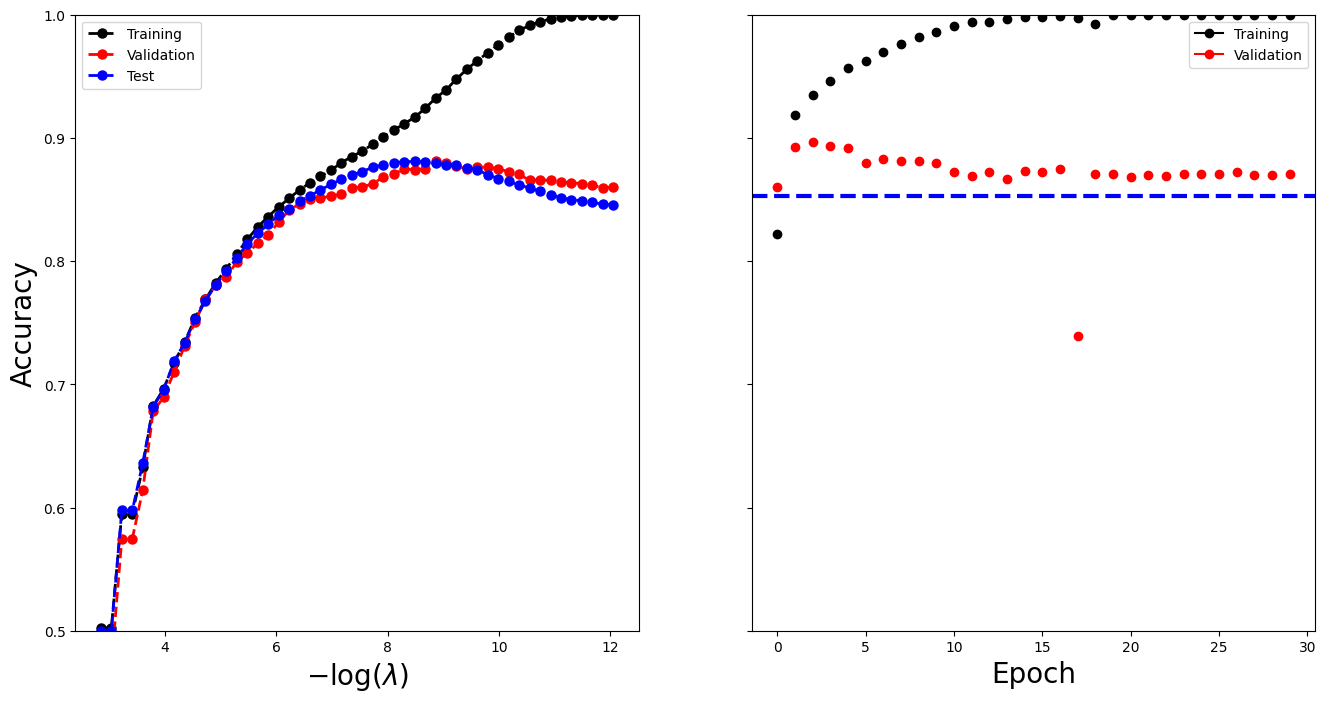

In [76]:
imdb_results = pd.read_csv(imdb_logger.experiment.metrics_file_path)
summary_plot(imdb_results ,
axes[1],
col='accuracy',
ylabel='Accuracy')
axes[1]. set_xticks(np.linspace(0, 30, 7).astype(int))
axes[1]. set_ylabel('Accuracy', fontsize=20)
axes[1]. set_xlabel('Epoch', fontsize=20)
axes[1]. set_ylim([0.5, 1]);
axes[1].axhline(test_results [0]['test_accuracy'],
color='blue',
linestyle='--',
linewidth=3)
fig

In [77]:
del(imdb_model ,
imdb_trainer ,
imdb_logger ,
imdb_dm ,
imdb_train ,
imdb_test)

# 10.9.6 Recurrent Neural Networks

In [79]:
imdb_seq_dm = SimpleDataModule(imdb_seq_train ,
imdb_seq_test ,
validation=2000,
batch_size=300,
num_workers=min(6, max_num_workers)
)

In [81]:
class LSTMModel(nn.Module):
  def __init__(self , input_size):
    super(LSTMModel , self).__init__()
    self.embedding = nn.Embedding(input_size , 32)
    self.lstm = nn.LSTM(input_size=32,
    hidden_size=32,
    batch_first=True)
    self.dense = nn.Linear(32, 1)
  def forward(self , x):
    val , (h_n , c_n) = self.lstm(self.embedding(x))
    return torch.flatten(self.dense(val[:,-1]))


In [82]:
lstm_model = LSTMModel(X_test.shape[-1])
summary(lstm_model ,
input_data=imdb_seq_train.tensors [0][:10],
col_names=['input_size',
'output_size',
'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
LSTMModel                                [10, 500]                 [10]                      --
├─Embedding: 1-1                         [10, 500]                 [10, 500, 32]             320,096
├─LSTM: 1-2                              [10, 500, 32]             [10, 500, 32]             8,448
├─Linear: 1-3                            [10, 32]                  [10, 1]                   33
Total params: 328,577
Trainable params: 328,577
Non-trainable params: 0
Total mult-adds (M): 45.44
Input size (MB): 50.00
Forward/backward pass size (MB): 2.56
Params size (MB): 1.31
Estimated Total Size (MB): 53.87

In [83]:
lstm_module = SimpleModule.binary_classification(lstm_model)
lstm_logger = CSVLogger('logs', name='IMDB_LSTM')

In [84]:
lstm_trainer = Trainer(deterministic=True ,
max_epochs=20,
logger=lstm_logger ,
callbacks=[ErrorTracker()])
lstm_trainer.fit(lstm_module ,
datamodule=imdb_seq_dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | LSTMModel         | 328 K  | train
1 | loss  | BCEWithLogitsLoss | 0      | train
----------------------------------------------------
328 K     Trainable params
0         Non-trainable params
328 K     Total params
1.314     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [85]:
In [90]: lstm_trainer.test(lstm_module , datamodule=imdb_seq_dm)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8368399739265442     │
│         test_loss         │    0.7894959449768066     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.7894959449768066, 'test_accuracy': 0.8368399739265442}]

(0.5, 1.0)

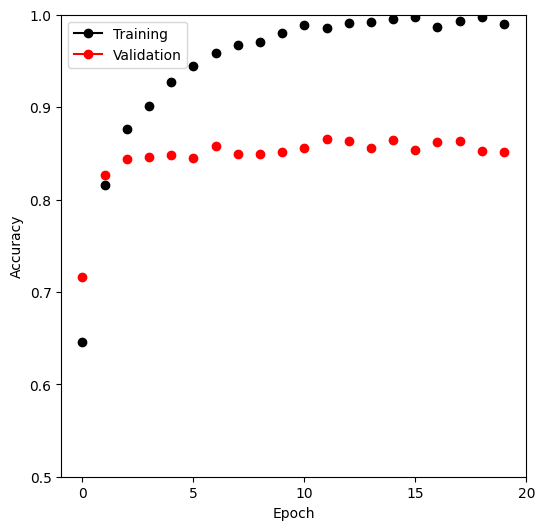

In [86]:
lstm_results = pd.read_csv(lstm_logger.experiment.metrics_file_path)
fig , ax = subplots(1, 1, figsize=(6, 6))
summary_plot(lstm_results ,
ax,
col='accuracy',
ylabel='Accuracy')
ax.set_xticks(np.linspace(0, 20, 5).astype(int))
ax.set_ylabel('Accuracy')
ax.set_ylim([0.5, 1])


In [87]:
del(lstm_model ,
lstm_trainer ,
lstm_logger ,
imdb_seq_dm ,
imdb_seq_train ,
imdb_seq_test)


## Time Series Prediction

In [88]:
NYSE = load_data('NYSE')
cols = ['DJ_return', 'log_volume', 'log_volatility']
X = pd.DataFrame(StandardScaler(
with_mean=True ,
with_std=True).fit_transform(NYSE[cols]),
columns=NYSE[cols].columns ,
index=NYSE.index)

In [89]:
for lag in range(1, 6):
  for col in cols:
    newcol = np.zeros(X.shape[0]) * np.nan
    newcol[lag:] = X[col].values[:-lag]
    X.insert(len(X.columns), "{0}_{1}".format(col , lag), newcol)
X.insert(len(X.columns), 'train', NYSE['train'])
X = X.dropna()

In [90]:
Y, train = X['log_volume'], X['train']
X = X.drop(columns=['train'] + cols)
X.columns

Index(['DJ_return_1', 'log_volume_1', 'log_volatility_1', 'DJ_return_2',
       'log_volume_2', 'log_volatility_2', 'DJ_return_3', 'log_volume_3',
       'log_volatility_3', 'DJ_return_4', 'log_volume_4', 'log_volatility_4',
       'DJ_return_5', 'log_volume_5', 'log_volatility_5'],
      dtype='object')

In [92]:
M = LinearRegression()
M.fit(X[train], Y[train])
M.score(X[~train], Y[~train])

0.4128912938562521

In [93]:
X_day = pd.merge(X,
pd.get_dummies(NYSE['day_of_week']),
on='date')

In [95]:
M.fit(X_day[train], Y[train])
M.score(X_day[~train], Y[~train])

0.4595563133053274

In [97]:
ordered_cols = []
for lag in range(5,0,-1):
  for col in cols:
    ordered_cols.append('{0}_{1}'.format(col , lag))
X = X.reindex(columns=ordered_cols)
X.columns

Index(['DJ_return_5', 'log_volume_5', 'log_volatility_5', 'DJ_return_4',
       'log_volume_4', 'log_volatility_4', 'DJ_return_3', 'log_volume_3',
       'log_volatility_3', 'DJ_return_2', 'log_volume_2', 'log_volatility_2',
       'DJ_return_1', 'log_volume_1', 'log_volatility_1'],
      dtype='object')

In [98]:
X_rnn = X.to_numpy().reshape((-1,5,3))
X_rnn.shape

(6046, 5, 3)

In [100]:
class NYSEModel(nn.Module):
  def __init__(self):
    super(NYSEModel , self).__init__()
    self.rnn = nn.RNN(3,
    12,
    batch_first=True)
    self.dense = nn.Linear(12, 1)
    self.dropout = nn.Dropout (0.1)
  def forward(self , x):
    val , h_n = self.rnn(x)
    val = self.dense(self.dropout(val[:,-1]))
    return torch.flatten(val)
nyse_model = NYSEModel()

In [101]:
datasets = []
for mask in [train , ~train]:
  X_rnn_t = torch.tensor(X_rnn[mask].astype(np.float32))
  Y_t = torch.tensor(Y[mask].astype(np.float32))
  datasets.append(TensorDataset(X_rnn_t , Y_t))
nyse_train , nyse_test = datasets

<ipython-input-101-1394872ccfed>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_t = torch.tensor(Y[mask].astype(np.float32))
<ipython-input-101-1394872ccfed>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_t = torch.tensor(Y[mask].astype(np.float32))


In [102]:
summary(nyse_model ,
input_data=X_rnn_t ,
col_names=['input_size',
'output_size',
'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
NYSEModel                                [1770, 5, 3]              [1770]                    --
├─RNN: 1-1                               [1770, 5, 3]              [1770, 5, 12]             204
├─Dropout: 1-2                           [1770, 12]                [1770, 12]                --
├─Linear: 1-3                            [1770, 12]                [1770, 1]                 13
Total params: 217
Trainable params: 217
Non-trainable params: 0
Total mult-adds (M): 1.83
Input size (MB): 0.11
Forward/backward pass size (MB): 0.86
Params size (MB): 0.00
Estimated Total Size (MB): 0.97

In [103]:
nyse_dm = SimpleDataModule(nyse_train ,
nyse_test ,
num_workers=min(4, max_num_workers),
validation=nyse_test ,
batch_size =64)

In [105]:
for idx , (x, y) in enumerate(nyse_dm.train_dataloader()):
  out = nyse_model(x)
  print(y.size(), out.size())
  if idx >= 2:
    break

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])


In [106]:
nyse_optimizer = RMSprop(nyse_model.parameters(),
lr=0.001)
nyse_module = SimpleModule.regression(nyse_model ,
optimizer=nyse_optimizer ,
metrics={'r2':R2Score()})


In [107]:
nyse_trainer = Trainer(deterministic=True ,
max_epochs=200,
callbacks=[ErrorTracker()])
nyse_trainer.fit(nyse_module ,
datamodule=nyse_dm)
nyse_trainer.test(nyse_module ,
datamodule=nyse_dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type      | Params | Mode 
--------------------------------------------
0 | model | NYSEModel | 217    | train
1 | loss  | MSELoss   | 0      | train
--------------------------------------------
217       Trainable params
0         Non-trainable params
217       Total params
0.001     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6189771294593811     │
│          test_r2          │    0.41256052255630493    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.6189771294593811, 'test_r2': 0.41256052255630493}]

In [108]:
datasets = []
for mask in [train , ~train]:
  X_day_t = torch.tensor(
  np.asarray(X_day[mask]).astype(np.float32))
  Y_t = torch.tensor(np.asarray(Y[mask]).astype(np.float32))
  datasets.append(TensorDataset(X_day_t , Y_t))
day_train , day_test = datasets

In [109]:
day_dm = SimpleDataModule(day_train ,
day_test ,
num_workers=min(4, max_num_workers),
validation=day_test ,
batch_size =64)

In [110]:
class NonLinearARModel(nn.Module):
  def __init__(self):
    super(NonLinearARModel , self).__init__()
    self._forward = nn.Sequential(nn.Flatten(),
    nn.Linear(20, 32),
    nn.ReLU(),
    nn.Dropout (0.5),
    nn.Linear(32, 1))
  def forward(self , x):
    return torch.flatten(self._forward(x))

In [111]:
l_model = NonLinearARModel()
nl_optimizer = RMSprop(nl_model.parameters(),
lr=0.001)
nl_module = SimpleModule.regression(nl_model ,
optimizer=nl_optimizer ,
metrics={'r2':R2Score()})

NameError: name 'nl_model' is not defined

In [ ]:
nl_trainer = Trainer(deterministic=True ,
max_epochs=20,
callbacks=[ErrorTracker()])
nl_trainer.fit(nl_module , datamodule=day_dm)
nl_trainer.test(nl_module , datamodule=day_dm)